# Data Gathering


#### **Sources of Data**

A vast amount of historical data can be found in files such as:
* MS Word documents
* Emails
* Spreadsheets
* MS PowerPoints
* PDFs
* HTML
* and plaintext files

Public and Private Archives

CSV, JSON, and XML files use plaintext, a common format, and are compatible with a wide range of applications

The Web can be mined for data using a web scraping application

The IoT uses sensors create data

Sensors in smartphones, cars, airplanes, street lamps, and home appliances capture raw data

#### **Open Data and Private Data**

1. Open Data

> The Open Knowledge Foundation describes Open Data as “any content, information or data that people are free to use, reuse, and redistribute without any legal, technological, or social restriction.”

2. Private Data

> Data related to an expectation of privacy and regulated by a particular country/government





#### **Structured and Unstructured Data**

1. Structured Data
> Data entered and maintained in fixed fields within a file or record
Easily entered, classified, queried, and analyzed
Relational databases or spreadsheets
2. Unstructured Data
Lacks organization
> Raw data
> Photo contents, audio, video, web pages, blogs, books, journals, white papers, PowerPoint presentations, articles, email, wikis, word processing documents, and text in general






## **Data Gathering**

The process of locating data and then determining if there is enough data to complete the analysis. 



### **Example of gathering upload and download   from the speedtest command.**

In [ ]:
!pip install speedtest-cli

In [ ]:
import datetime
# Python library to read and write csv files
import csv

import subprocess

In [ ]:
date_time = datetime.datetime.now()
print(date_time, type(date_time))

2021-06-01 05:18:06.315152 <class 'datetime.datetime'>


In [ ]:
date_time.strftime('%a, %d %b %Y %H:%M:%S')

'Tue, 01 Jun 2021 05:18:06'

In [ ]:
# Parse datetime string into format: YYYY-MM-DD HH:MM::SS
date_time.strftime('%Y-%m-%d %H:%M:%S')

'2021-06-01 05:18:06'

In [ ]:
# This string contains the command line to interface with speedtest.net
speedtest_cmd = "speedtest-cli --simple"
# Execute the process
process = subprocess.Popen(speedtest_cmd.split(), stdout=subprocess.PIPE)
# Collect the command output
process_output = process.communicate()[0]

In [ ]:
print(process_output, type(process_output))

b'Ping: 21.65 ms\nDownload: 388.75 Mbit/s\nUpload: 678.05 Mbit/s\n' <class 'bytes'>


In [ ]:
# Store the time at which the speedtest was executed
date_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
process_output = process_output.split()
process_output.append(date_time)
print(process_output, type(process_output))

[b'Ping:', b'21.65', b'ms', b'Download:', b'388.75', b'Mbit/s', b'Upload:', b'678.05', b'Mbit/s', '2021-06-01 05:18:41'] <class 'list'>


In [ ]:
# function to excute the speed test
def speedtest():
    # We need to store the time at which the speedtest was executed
    date_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    # This is a string that contains what we would write on the command line 
    #to interface with speedtest.net
    speedtest_cmd = "speedtest-cli --simple"
    # We now execute the process: 
    process = subprocess.Popen(speedtest_cmd.split(), stdout=subprocess.PIPE)
    process_output = process.communicate()[0]
    process_output = process_output.split()
    # and we add the date and time 
    process_output.append(date_time)
    return process_output

In [ ]:
process_output

[b'Ping:',
 b'21.65',
 b'ms',
 b'Download:',
 b'388.75',
 b'Mbit/s',
 b'Upload:',
 b'678.05',
 b'Mbit/s',
 '2021-06-01 05:18:41']

In [ ]:
with open("test.txt",'w') as f:
    f.write('test_msg')

In [ ]:
!cat /tmp/test.txt

cat: /tmp/test.txt: No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code cell 13
with open("test.txt",'r') as f:
   str = f.read()
print(str)

test_msg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# function to save data to csv
def save_to_csv(data, filename):
    try:
        # If the file exists, we want to append a new line to it, with the 
        #results of the current experiment
        with open(filename + '.csv', 'a') as f:
            wr = csv.writer(f)
            wr.writerow(data)
    except:
        # If it does not exist, we want to create the file first
        with open(filename + '.csv', 'w') as f:
            wr = csv.writer(f)
            wr.writerow(data)

In [ ]:
def print_from_csv(filename): 
    with open(filename + '.csv', 'r') as f:
            re = csv.reader(f)
            for row in re:
                print(' '.join(row))

In [ ]:
for i in range(10):
    speedtest_output = speedtest()
    print('Test number {}'.format(i))
    print(speedtest_output)
    save_to_csv(speedtest_output, '/content/drive/My Drive/Colab Notebooks/Dataset/rpi_data_test')

Test number 0
[b'Ping:', b'16.292', b'ms', b'Download:', b'527.05', b'Mbit/s', b'Upload:', b'428.35', b'Mbit/s', '2021-06-01 05:20:20']
Test number 1
[b'Ping:', b'16.542', b'ms', b'Download:', b'765.55', b'Mbit/s', b'Upload:', b'239.15', b'Mbit/s', '2021-06-01 05:20:32']
Test number 2
[b'Ping:', b'13.804', b'ms', b'Download:', b'643.00', b'Mbit/s', b'Upload:', b'318.17', b'Mbit/s', '2021-06-01 05:20:42']
Test number 3
[b'Ping:', b'14.588', b'ms', b'Download:', b'796.32', b'Mbit/s', b'Upload:', b'344.00', b'Mbit/s', '2021-06-01 05:20:52']
Test number 4
[b'Ping:', b'14.138', b'ms', b'Download:', b'843.85', b'Mbit/s', b'Upload:', b'370.01', b'Mbit/s', '2021-06-01 05:21:01']
Test number 5
[b'Ping:', b'13.824', b'ms', b'Download:', b'862.25', b'Mbit/s', b'Upload:', b'278.64', b'Mbit/s', '2021-06-01 05:21:09']
Test number 6
[b'Ping:', b'14.131', b'ms', b'Download:', b'855.76', b'Mbit/s', b'Upload:', b'411.25', b'Mbit/s', '2021-06-01 05:21:19']
Test number 7
[b'Ping:', b'13.848', b'ms', b'Dow

In [ ]:
print_from_csv('/content/drive/My Drive/Colab Notebooks/Dataset/rpi_data_test')

b'Ping:' b'36.266' b'ms' b'Download:' b'1051.17' b'Mbit/s' b'Upload:' b'339.29' b'Mbit/s' 2021-05-31 02:58:01
b'Ping:' b'36.381' b'ms' b'Download:' b'1064.79' b'Mbit/s' b'Upload:' b'350.47' b'Mbit/s' 2021-05-31 02:58:12
b'Ping:' b'33.803' b'ms' b'Download:' b'1050.89' b'Mbit/s' b'Upload:' b'277.12' b'Mbit/s' 2021-05-31 02:58:21
b'Ping:' b'34.292' b'ms' b'Download:' b'1059.85' b'Mbit/s' b'Upload:' b'383.27' b'Mbit/s' 2021-05-31 02:58:30
b'Ping:' b'33.999' b'ms' b'Download:' b'1047.26' b'Mbit/s' b'Upload:' b'262.18' b'Mbit/s' 2021-05-31 02:58:39
b'Ping:' b'34.964' b'ms' b'Download:' b'1051.91' b'Mbit/s' b'Upload:' b'231.62' b'Mbit/s' 2021-05-31 02:58:48
b'Ping:' b'33.786' b'ms' b'Download:' b'1054.34' b'Mbit/s' b'Upload:' b'347.61' b'Mbit/s' 2021-05-31 02:58:59
b'Ping:' b'34.035' b'ms' b'Download:' b'1053.21' b'Mbit/s' b'Upload:' b'338.53' b'Mbit/s' 2021-05-31 02:59:07
b'Ping:' b'33.73' b'ms' b'Download:' b'1061.64' b'Mbit/s' b'Upload:' b'343.74' b'Mbit/s' 2021-05-31 02:59:16
b'Ping:' b'

### **Example of gathering image data using webcam**

Note: Run this snippet using local jupyter notebook

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd 
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'): 
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            print("Converted RGB image to grayscale...")
            print("Resizing image to 28x28 scale...")
            img_ = cv2.resize(gray,(28,28))
            print("Resized...")
            img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
            print("Image saved!")
        
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

False
None


DisabledFunctionError: ignored

### **Example of gathering voice data using microphone**

Note: Run the snippet of codes using local jupyter notebook

In [ ]:
!pip3 install sounddevice

In [ ]:
!pip3 install wavio

In [ ]:
!pip3 install scipy

In [ ]:
!apt-get install libportaudio2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (161 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1) ...
Setting up libportaudio2:amd64 (19.6.0-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py

In [ ]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
  
# Sampling frequency
freq = 44100
  
# Recording duration
duration = 5
  
# Start recorder with the given values 
# of duration and sample frequency
recording = sd.rec(int(duration * freq), 
                   samplerate=freq, channels=2)
  
# Record audio for the given number of seconds
sd.wait()
  
# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)
  
# Convert the NumPy array to audio file
wv.write("recording1.wav", recording, freq, sampwidth=2)

### **Web Scraping**

**Web scraping, web harvesting, or web data extraction** is data scraping used for extracting data from websites. The web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.

Reference: [link text](https://en.wikipedia.org/wiki/Web_scraping)


#### **Image Scraping using BeautifulSoup and Request**

In [ ]:
!pip install bs4

In [ ]:
pip install requests

In [ ]:
import requests 
from bs4 import BeautifulSoup 
    
def getdata(url): 
    r = requests.get(url) 
    return r.text 
    
htmldata = getdata("https://www.google.com/") 
soup = BeautifulSoup(htmldata, 'html.parser') 
for item in soup.find_all('img'):
    print(item['src'])

/images/branding/googlelogo/1x/googlelogo_white_background_color_272x92dp.png


In [ ]:
pip install selenium

     |████████████████████████████████| 911kB 3.8MB/s 


#### **Image Scraping using Selenium**

Note: Run the snippet of code using local jupyter notebook

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
import time
import requests
import shutil
import os
import getpass
import urllib.request
import io
import time
from PIL import Image

user = getpass.getuser()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
driver.get(search_url.format(q='Car'))

def scroll_to_end(driver):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)#sleep_between_interactions
    
def getImageUrls(name,totalImgs,driver):
    
    search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
    driver.get(search_url.format(q=name))
    img_urls = set()
    img_count = 0
    results_start = 0  
    
    while(img_count<totalImgs): #Extract actual images now
        
        scroll_to_end(driver)
        
        thumbnail_results = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
        totalResults=len(thumbnail_results)
        print(f"Found: {totalResults} search results. Extracting links from{results_start}:{totalResults}")
        
        for img in thumbnail_results[results_start:totalResults]:
            
            img.click()
            time.sleep(2)
            actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                    img_urls.add(actual_image.get_attribute('src'))
            
            img_count=len(img_urls)
            
            if img_count >= totalImgs:
                print(f"Found: {img_count} image links")
                break
            else:
                print("Found:", img_count, "looking for more image links ...")                
                load_more_button = driver.find_element_by_css_selector(".mye4qd")
                driver.execute_script("document.querySelector('.mye4qd').click();")
                results_start = len(thumbnail_results)
    return img_urls


def downloadImages(folder_path,file_name,url):
    try:
        
        image_content = requests.get(url).content
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")
    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
       
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")
        
def saveInDestFolder(searchNames,destDir,totalImgs,driver):
    for name in list(searchNames):
        path=os.path.join(destDir,name)
        if not os.path.isdir(path):
            os.mkdir(path)
        print('Current Path',path)
        totalLinks=getImageUrls(name,totalImgs,driver)
        print('totalLinks',totalLinks)

    if totalLinks is None:
            print('images not found for :',name)
            
    else:
        for i, link in enumerate(totalLinks):
            file_name = f"{i:150}.jpg"
            downloadImages(path,file_name,link)
      
searchNames=['lion'] 
destDir=f'/content/drive/My Drive/Colab Notebooks/Dataset/'
totalImgs=5

saveInDestFolder(searchNames,destDir,totalImgs,driver)

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: use options instead of chrome_options


Current Path /content/drive/My Drive/Colab Notebooks/Dataset/lion
Found: 100 search results. Extracting links from0:100
Found: 0 looking for more image links ...
Found: 1 looking for more image links ...
Found: 2 looking for more image links ...
Found: 3 looking for more image links ...
Found: 4 looking for more image links ...
Found: 4 looking for more image links ...
Found: 5 image links
totalLinks {'https://upload.wikimedia.org/wikipedia/commons/1/1e/Cecil_the_lion_at_Hwange_National_Park_%284516560206%29.jpg', 'https://live.staticflickr.com/193/494118044_a0439df4c9_b.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/White-lion.jpg/1280px-White-lion.jpg', 'https://live.staticflickr.com/4048/4394847127_be8e440a50_b.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Lion_waiting_in_Namibia.jpg/800px-Lion_waiting_in_Namibia.jpg'}
SAVED - https://upload.wikimedia.org/wikipedia/commons/1/1e/Cecil_the_lion_at_Hwange_National_Park_%284516560206%29.jpg - AT: /co

#### **Web Scraping of Movies Information using BeautifulSoup**

We want to analyze the distributions of IMDB and Metacritic movie ratings to see if we find anything interesting. To do this, we’ll first scrape data for over 2000 movies.

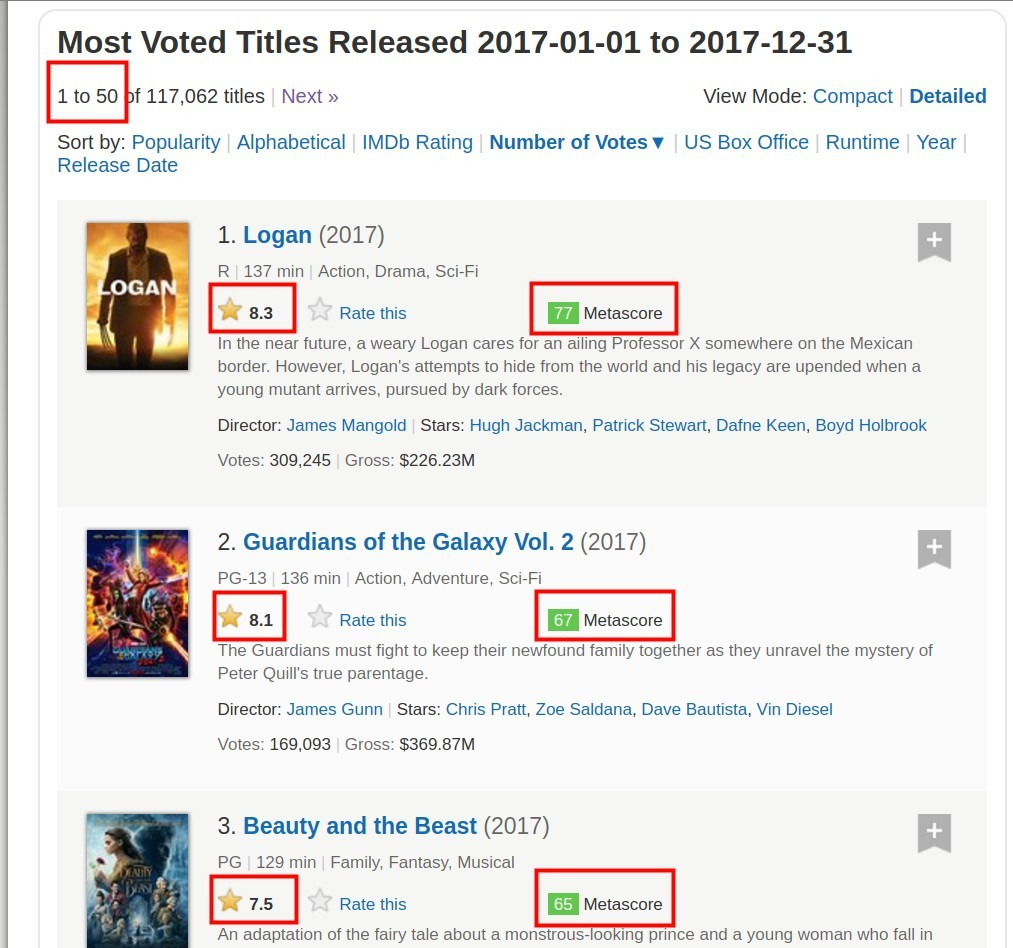

Identifying the URL structure

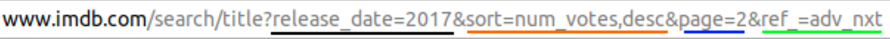

In the image above, you can see that the URL has several parameters after the question mark:

* release_date — Shows only the movies released in a specific year.
* sort — Sorts the movies on the page. sort=num_votes,desc translates to sort by number of votes in a descending order.
* page — Specifies the page number.
* ref_ — Takes us to the the next or the previous page. The reference is the page we are currently on. adv_nxt and adv_prv are two possible values. They translate to advance to the next page, and advance to the previous page, respectivel

In [ ]:
from requests import get
url = 'https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


Understanding the HTML structure of a single page

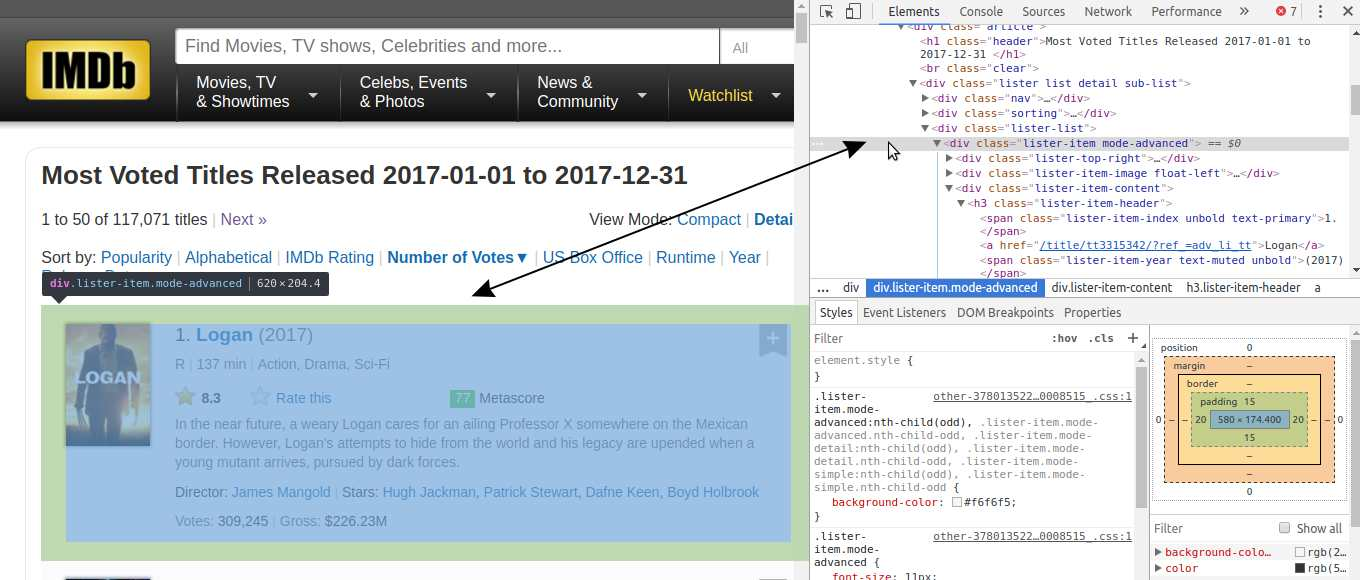

Using BeautifulSoup to parse the HTML content

To parse our HTML document and extract the 50 div containers, we’ll use a Python module called BeautifulSoup, the most common web scraping module for Python.

In the following code cell we will:

* Import the BeautifulSoup class creator from the package bs4.
* Parse response.text by creating a BeautifulSoup object, and assign this object to html_soup. The 'html.parser' argument indicates that we want to do the parsing using Python’s built-in HTML parser.

In [ ]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
headers = {'Accept-Language': 'en-US,en;q=0.8'}
type(html_soup)

bs4.BeautifulSoup

Before extracting the 50 div containers, we need to figure out what distinguishes them from other div elements on that page. Often, the distinctive mark resides in the class attribute. If you inspect the HTML lines of the containers of interest, you’ll notice that the class attribute has two values: lister-item and mode-advanced. This combination is unique to these div containers. We can see that’s true by doing a quick search (Ctrl + F). We have 50 such containers, so we expect to see only 50 matches:

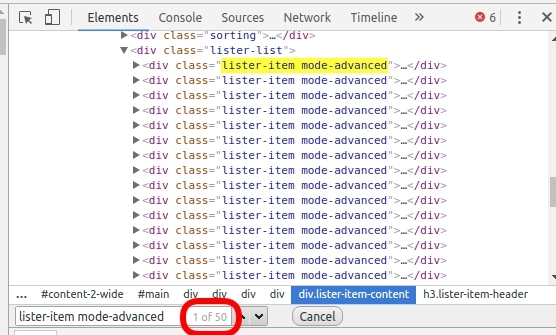

Now let’s use the find_all() method to extract all the div containers that have a class attribute of lister-item mode-advanced:

In [ ]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


find_all() returned a ResultSet object which is a list containing all the 50 divs we are interested in.

Now we’ll select only the first container, and extract, by turn, each item of interest:

* The name of the movie.
* The year of release.
* The IMDB rating.
* The Metascore.
* The number of votes.

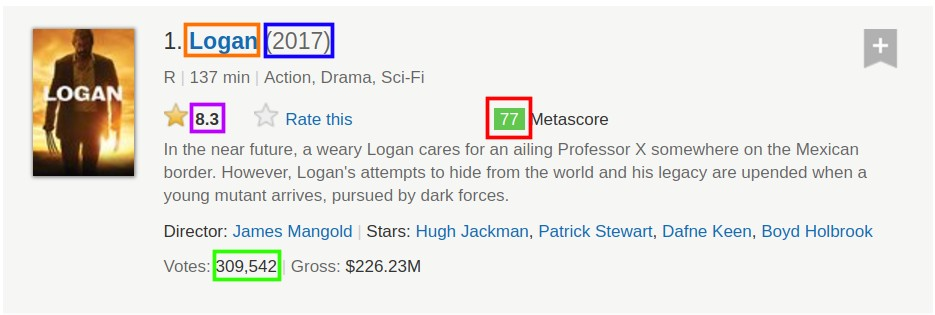

Extracting the data for a single movie

We can access the first container, which contains information about a single movie, by using list notation on movie_containers.

In [ ]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Drama, Sci-Fi            </span>


The name of the movie

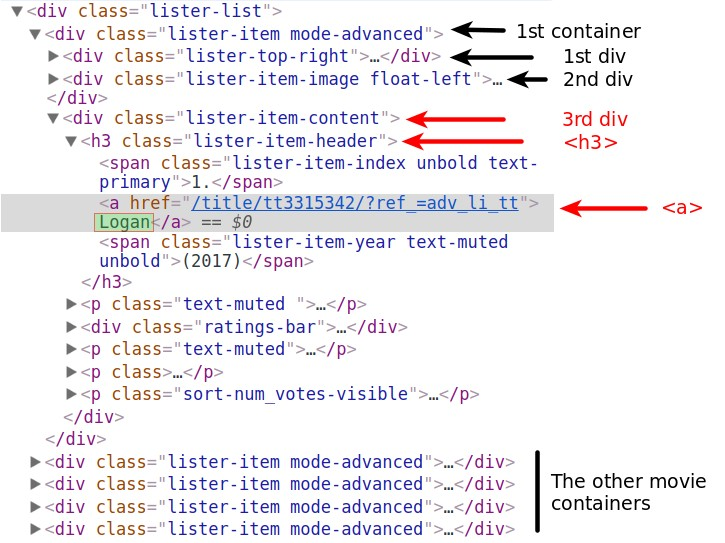

In [ ]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [ ]:
first_movie.a

<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a>

In [ ]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [ ]:
first_movie.h3.a

<a href="/title/tt3315342/">Logan</a>

In [ ]:
first_name = first_movie.h3.a.text
first_name

'Logan'

The year of the movie’s release

In [ ]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [ ]:
first_year = first_year.text
first_year

'(2017)'

The IMDB rating

In [ ]:
first_movie.strong

<strong>8.1</strong>

In [ ]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

The Metascore

In [ ]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


The number of votes

In [ ]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="667461" name="nv">667,461</span>

In [ ]:
first_votes['data-value']

'667461'

In [ ]:
first_votes = int(first_votes['data-value'])

The script 

In [ ]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container

for container in movie_containers:
    
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
      name = container.h3.a.text
      names.append(name)
# The year
      year = container.h3.find('span', class_ = 'lister-item-year').text
      years.append(year)
# The IMDB rating
      imdb = float(container.strong.text)
      imdb_ratings.append(imdb)
# The Metascore
      m_score = container.find('span', class_ = 'metascore').text
      metascores.append(int(m_score))
# The number of votes
      vote = container.find('span', attrs = {'name':'nv'})['data-value']
      votes.append(int(vote))

In [ ]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      42 non-null     object 
 1   year       42 non-null     object 
 2   imdb       42 non-null     float64
 3   metascore  42 non-null     int64  
 4   votes      42 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,667461
1,Thor: Ragnarok,(2017),7.9,74,615570
2,Wonder Woman,(2017),7.4,76,594410
3,Guardians of the Galaxy Vol. 2,(2017),7.6,67,589160
4,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,84,577006
5,Dunkirk,(2017),7.8,94,575108
6,Spider-Man: Homecoming,(2017),7.4,73,532718
7,Get Out,(I) (2017),7.7,85,509953
8,Blade Runner 2049,(2017),8.0,81,479952
9,It,(I) (2017),7.3,69,471568


The script for multiple pages

In [ ]:
from time import time
from time import sleep
from random import randint

from IPython.core.display import clear_output
pages = [ '1','2','3','4','5']
years_url = [ '2017', '2018', '2019', '2020']

# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('https://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:20; Frequency: 0.08430509283518908 requests/s


In [ ]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      830 non-null    object 
 1   year       830 non-null    object 
 2   imdb       830 non-null    float64
 3   metascore  830 non-null    int64  
 4   votes      830 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 32.5+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,667461
1,Thor: Ragnarok,(2017),7.9,74,615570
2,Wonder Woman,(2017),7.4,76,594410
3,Guardians of the Galaxy Vol. 2,(2017),7.6,67,589160
4,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,84,577006
5,Dunkirk,(2017),7.8,94,575108
6,Spider-Man: Homecoming,(2017),7.4,73,532718
7,Get Out,(I) (2017),7.7,85,509953
8,Blade Runner 2049,(2017),8.0,81,479952
9,It,(I) (2017),7.3,69,471568


In [ ]:
movie_ratings.tail(10)

,movie,year,imdb,metascore,votes
820,Spenser Confidential,(2020),6.2,49,75101
821,The Midnight Sky,(2020),5.6,58,74202
822,The Social Dilemma,(2020),7.6,78,70702
823,I'm Thinking of Ending Things,(2020),6.6,78,69026
824,Underwater,(2020),5.8,48,67988
825,Hamilton,(2020),8.5,90,65067
826,Bloodshot,(2020),5.7,44,64790
827,News of the World,(2020),6.8,73,64451
828,The Father,(I) (2020),8.3,88,63849
829,Mank,(2020),6.9,79,61200


In [ ]:
movie_ratings.to_csv('/content/drive/My Drive/Colab Notebooks/Dataset/movie_ratings.csv')

# Data Preparation

* Collected data may not be compatible or formatted correctly
* Data must be prepared before it can be added to a data set
* Extract, Transform and Load (ETL) 
> process for collecting data from a variety of sources, transforming the data, and then loading the data into a database

#### **Data preprocessing** 

Data Processing is a process of cleaning the raw data i.e. the data is collected in the real world and is converted to a clean data set. In other words, whenever the data is gathered from different sources it is collected in a raw format and this data isn’t feasible for the analysis.
Therefore, certain steps are executed to convert the data into a small clean data set, this part of the process is called as data preprocessing. 

Most of the real-world data is messy, some of these types of data are:
1. **Missing data**: Missing data can be found when it is not continuously created or due to technical issues in the application (IOT system).
2. **Noisy Data** This type of data is also called outliners, this can occur due to human errors (human manually gathering the data) or some technical problem of the device at the time of collection of data.
3. **Inconsistent data:** This type of data might be collected due to human errors (mistakes with the name or values) or duplication of data.


These are some of the basic pre processing techniques that can be used to convert raw data.
1. **Conversion of data:** As we know that Machine Learning models can only handle numeric features, hence categorical and ordinal data must be somehow converted into numeric features.
2. **Ignoring the missing values:** Whenever we encounter missing data in the data set then we can remove the row or column of data depending on our need. This method is known to be efficient but it shouldn’t be performed if there are a lot of missing values in the dataset.
3. **Filling the missing values:** Whenever we encounter missing data in the data set then we can fill the missing data manually, most commonly the mean, median or highest frequency value is used.
4. **Machine learning:** If we have some missing data then we can predict what data shall be present at the empty position by using the existing data.
5. **Outliers detection:** There are some error data that might be present in our data set that deviates drastically from other observations in a data set. [Example: human weight = 800 Kg; due to mistyping of extra 0]




#### Example of data preparation in a csv file

In [ ]:
import datetime
import csv
import pandas as pd
# NumPy is a library that adds support for large, multi-dimensional arrays and matrices
# along with high-level mathematical functions to operate on these arrays
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#set the location of the data file
filepath = '/content/drive/My Drive/Colab Notebooks/Dataset/rpi_data_long.csv'

In [ ]:
data_file = '/content/drive/My Drive/Colab Notebooks/Dataset/rpi_data_long.csv'

In [ ]:
!head -n 5 '/content/drive/My Drive/Colab Notebooks/Dataset/rpi_data_long.csv'

Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [ ]:
column_names = [ 'Type A', 'Measure A', 'Units A',
                 'Type B', 'Measure B', 'Units B',
                 'Type C', 'Measure C', 'Units C', 
                 'Datetime']

In [ ]:
with open(data_file, 'r') as f:
    df_redundant = pd.read_csv(f, names = column_names)

In [ ]:
df_redundant.head()

,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [ ]:
# Copy df_redundant into another dataframe called df_compact using copy()
df_compact = df_redundant.copy()

In [ ]:
df_compact.rename(columns={'Measure A':'Ping (ms)', 
                           'Measure B': 'Download (Mbit/s)',
                           'Measure C': 'Upload (Mbit/s)'}, inplace=True)
df_compact.head(3)

,Type A,Ping (ms),Units A,Type B,Download (Mbit/s),Units B,Type C,Upload (Mbit/s),Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25


In [ ]:
df_compact.drop(['Type A', 'Type B', 'Type C',
         'Units A', 'Units B', 'Units C'], axis=1, inplace=True)
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime
0,26.992,91.80,14.31,2016-11-24 13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27


In [ ]:
 ### Separate data into two columns
df_compact['Date'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).date())
temp = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str))
df_compact['Time'] = pd.to_datetime(df_compact['Datetime']).dt.time
df_compact.drop('Datetime', axis=1, inplace=True)

In [ ]:
df_compact.head(3)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25


In [ ]:
df_compact.dtypes


Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [ ]:
# Find and remove any null values
df_compact.isnull().sum().sum()



23

In [ ]:
# Remove NaN values
df_compact = df_compact.dropna()

In [ ]:
# Find and remove any null values
df_compact.isnull().sum().sum()

0

In [ ]:
# Convert Ping and Download to float
df_compact['Ping (ms)'] = df_compact['Ping (ms)'].apply(lambda val: float(val))
df_compact['Download (Mbit/s)'] = df_compact['Download (Mbit/s)'].apply(lambda val: float(val))


In [ ]:
df_compact.to_csv('rpi_data_processed.csv', index=False)
df_compact.dtypes

Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [ ]:
data_file = 'rpi_data_processed.csv'

In [ ]:
 df_compact = pd.read_csv(data_file)

In [ ]:
df_compact

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
668,20.952,88.67,14.35,2016-11-24,19:15:32
669,19.397,84.86,14.35,2016-11-24,19:16:04
670,20.117,84.99,14.33,2016-11-24,19:16:34
671,17.995,86.21,6.88,2016-11-24,19:17:04


#### Example of Data Preparation of movie_rating.csv

In [ ]:
movie_ratings['year'].unique()

array(['(2017)', '(I) (2017)', '(2018)', '(I) (2018)', '(III) (2018)',
       '(2019)', '(II) (2019)', '(I) (2019)', '(2020)', '(I) (2020)',
       '(II) (2020)'], dtype=object)

In [ ]:
movie_ratings.dtypes

movie         object
year          object
imdb         float64
metascore      int64
votes          int64
dtype: object

In [ ]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(I)','')))

In [ ]:
movie_ratings['year'].unique()

array(['(2017)', ' (2017)', '(2018)', ' (2018)', '(III) (2018)', '(2019)',
       '(II) (2019)', ' (2019)', '(2020)', ' (2020)', '(II) (2020)'],
      dtype=object)

In [ ]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(II)','')))

In [ ]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(III)','')))

In [ ]:
movie_ratings['year'].unique()

array(['(2017)', ' (2017)', '(2018)', ' (2018)', '(2019)', ' (2019)',
       '(2020)', ' (2020)'], dtype=object)

In [ ]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(','')))

In [ ]:
movie_ratings['year'].unique()

array(['2017)', ' 2017)', '2018)', ' 2018)', '2019)', ' 2019)', '2020)',
       ' 2020)'], dtype=object)

In [ ]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace(')','')))

In [ ]:
movie_ratings['year'].unique()

array(['2017', ' 2017', '2018', ' 2018', '2019', ' 2019', '2020', ' 2020'],
      dtype=object)

In [ ]:
movie_ratings['year'] = movie_ratings['year'].astype(int)

In [ ]:
movie_ratings['year'].unique()

array([2017, 2018, 2019, 2020])

In [ ]:
movie_ratings.dtypes

movie         object
year           int64
imdb         float64
metascore      int64
votes          int64
dtype: object

In [ ]:
movie_ratings.head(10)

,movie,year,imdb,metascore,votes
0,Logan,2017,8.1,77,667461
1,Thor: Ragnarok,2017,7.9,74,615570
2,Wonder Woman,2017,7.4,76,594410
3,Guardians of the Galaxy Vol. 2,2017,7.6,67,589160
4,Star Wars: Episode VIII - The Last Jedi,2017,7.0,84,577006
5,Dunkirk,2017,7.8,94,575108
6,Spider-Man: Homecoming,2017,7.4,73,532718
7,Get Out,2017,7.7,85,509953
8,Blade Runner 2049,2017,8.0,81,479952
9,It,2017,7.3,69,471568


In [ ]:
movie_ratings.tail(10)

,movie,year,imdb,metascore,votes
820,Spenser Confidential,2020,6.2,49,75101
821,The Midnight Sky,2020,5.6,58,74202
822,The Social Dilemma,2020,7.6,78,70702
823,I'm Thinking of Ending Things,2020,6.6,78,69026
824,Underwater,2020,5.8,48,67988
825,Hamilton,2020,8.5,90,65067
826,Bloodshot,2020,5.7,44,64790
827,News of the World,2020,6.8,73,64451
828,The Father,2020,8.3,88,63849
829,Mank,2020,6.9,79,61200
